In [1]:
import re
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [28]:
class logging:
    def __init__(self, file, num_train_iters=140, num_valid_iters=11, num_test_iters=12):
        self.file = file
        self.num_train_iters = num_train_iters
        self.num_valid_iters = num_valid_iters
        self.num_test_iters = num_test_iters
        self.train_dict = defaultdict(list)
        self.valid_dict = defaultdict(list)
        self.test_dict = defaultdict(list)
        
    def splitfile(self):
        epoch = -1;
        for i, j in enumerate(self.file):
            line = re.sub("\s+", ",", j.strip())
            if(len(line) > 80 and (line.split(",")[0] == 'TRAIN' or line.split(",")[0] == 'VALID' or line.split(",")[0] == 'TEST')):
                batch = int(line.split("/")[0].split(",")[2])
                if(batch == 0 and line.split(",")[0] == 'TRAIN'):
                    epoch += 1
                if(line.split(",")[0] == 'TRAIN'):
                    self.train_dict['iter'].append(self.num_train_iters*epoch + batch)
                    self.train_dict['tot-loss'].append(line.split(",")[5])
                    self.train_dict['NLL'].append(line.split(",")[8])
                    self.train_dict['KL'].append(line.split(",")[11])
                elif(line.split(",")[0] == 'VALID'):
                    self.valid_dict['iter'].append(self.num_valid_iters*epoch + batch)
                    self.valid_dict['tot-loss'].append(line.split(",")[5])
                    self.valid_dict['NLL'].append(line.split(",")[8])
                    self.valid_dict['KL'].append(line.split(",")[11])
                elif(line.split(",")[0] == 'TEST'):
                    self.test_dict['iter'].append(self.num_test_iters*epoch + batch)
                    self.test_dict['tot-loss'].append(line.split(",")[5])
                    self.test_dict['NLL'].append(line.split(",")[8])
                    self.test_dict['KL'].append(line.split(",")[11])
                    
        return self.train_dict, self.valid_dict, self.test_dict
                

In [29]:
class epoch_logging:
    def __init__(self, file, num_train_iters=140, num_valid_iters=11, num_test_iters=12):
        self.file = file
        self.num_train_iters = num_train_iters
        self.num_valid_iters = num_valid_iters
        self.num_test_iters = num_test_iters
        self.train_dict = defaultdict(list)
        self.valid_dict = defaultdict(list)
        self.test_dict = defaultdict(list)
        
    def split(self):
        epoch = -1;
        for i, j in enumerate(self.file):
            line = re.sub("\s+", ",", j.strip())
            if((line.split(",")[0] == 'TRAIN' or line.split(",")[0] == 'VALID' or line.split(",")[0] == 'TEST')):
                batch = int(line.split("/")[0].split(",")[2])
                if(batch == 0 and line.split(",")[0] == 'TRAIN'):
                    epoch += 1
                if(line.split(",")[1] != 'Epoch'):
                    continue
                if(line.split(",")[0] == 'TRAIN'):
                    self.train_dict['iter'].append(epoch)
                    self.train_dict['tot-loss'].append(line.split(",")[6])
                elif(line.split(",")[0] == 'VALID'):
                    self.valid_dict['iter'].append(epoch)
                    self.valid_dict['tot-loss'].append(line.split(",")[6])
                elif(line.split(",")[0] == 'TEST'):
                    self.test_dict['iter'].append(epoch)
                    self.test_dict['tot-loss'].append(line.split(",")[6])
                    
        return self.train_dict, self.valid_dict, self.test_dict	
                

In [30]:
# file = open('logs/saved_logs/log_train_agg.log', 'r')
# logs = logging(file)
# train_all, valid_all, test_all = logs.splitfile()
# file.close()
# file = open('logs/saved_logs/log_train_agg.log', 'r')
# epoch = epoch_logging(file)
# train, valid, test = epoch.split()

In [ ]:
file = open('logs/saved_logs/log_train_logistic.log', 'r')
logs = logging(file)
train_lin, valid_lin, _ = logs.splitfile()

In [ ]:
# file = open('logs/saved_logs/log_train_cyclic_logistic.log', 'r')
# logs = logging(file)
# train_cyclog, valid_cyclog, _ = logs.splitfile()

In [ ]:
# file = open('logs/saved_logs/log_train_cyclic_linear.log', 'r')
# logs = logging(file)
# train_cyclin, valid_cyclin, _ = logs.splitfile()

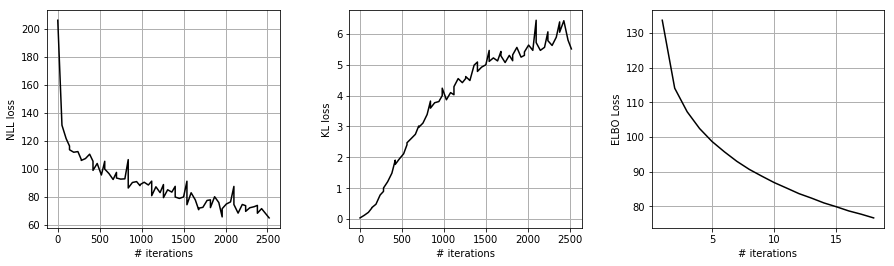

In [33]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.grid(b=True, linewidth=1)
ax1.set_ylabel('NLL loss')
ax1.set_xlabel('# iterations')
ax1.plot(list(map(int, train_all['iter'])), list(map(float, train_all['NLL'])), 'k', linestyle='-')

ax2.grid(b=True, linewidth=1)
ax2.set_ylabel('KL loss')
ax2.set_xlabel('# iterations')
ax2.plot(list(map(int, train_all['iter'])), list(map(float, train_all['KL'])), 'k', linestyle='-')

ax3.grid(b=True, linewidth=1)
ax3.set_ylabel('ELBO Loss')
ax3.set_xlabel('# iterations')
ax3.plot(list(map(int, train['iter'])), list(map(float, train['tot-loss'])), 'k', linestyle='-')

f.set_figheight(4)
f.set_figwidth(15)
f.subplots_adjust(wspace=0.3)
plt.show()

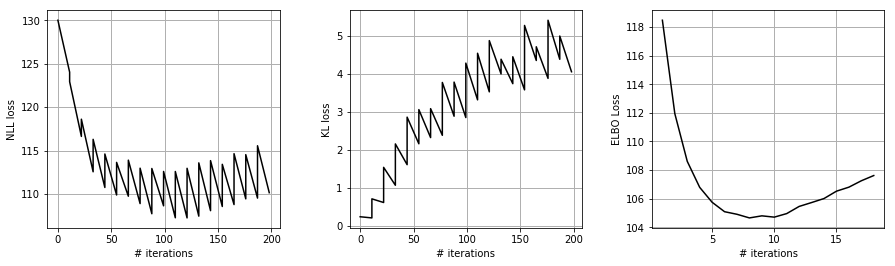

In [31]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.grid(b=True, linewidth=1)
ax1.set_ylabel('NLL loss')
ax1.set_xlabel('# iterations')
ax1.plot(list(map(int, valid_all['iter'])), list(map(float, valid_all['NLL'])), 'k', linestyle='-')

ax2.grid(b=True, linewidth=1)
ax2.set_ylabel('KL loss')
ax2.set_xlabel('# iterations')
ax2.plot(list(map(int, valid_all['iter'])), list(map(float, valid_all['KL'])), 'k', linestyle='-')

ax3.grid(b=True, linewidth=1)
ax3.set_ylabel('ELBO Loss')
ax3.set_xlabel('# iterations')
ax3.plot(list(map(int, valid['iter'])), list(map(float, valid['tot-loss'])), 'k', linestyle='-')

f.set_figheight(4)
f.set_figwidth(15)
f.subplots_adjust(wspace=0.3)
plt.show()

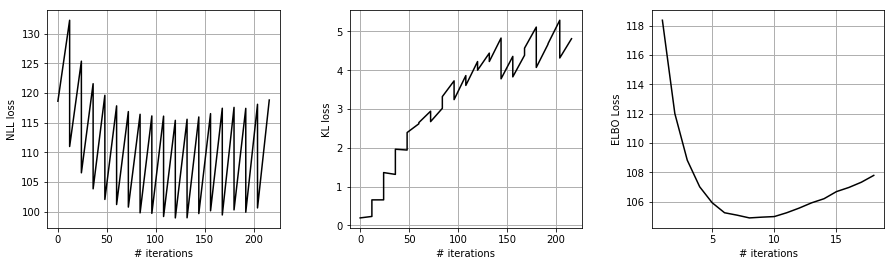

In [32]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.grid(b=True, linewidth=1)
ax1.set_ylabel('NLL loss')
ax1.set_xlabel('# iterations')
ax1.plot(list(map(int, test_all['iter'])), list(map(float, test_all['NLL'])), 'k', linestyle='-')

ax2.grid(b=True, linewidth=1)
ax2.set_ylabel('KL loss')
ax2.set_xlabel('# iterations')
ax2.plot(list(map(int, test_all['iter'])), list(map(float, test_all['KL'])), 'k', linestyle='-')

ax3.grid(b=True, linewidth=1)
ax3.set_ylabel('ELBO Loss')
ax3.set_xlabel('# iterations')
ax3.plot(list(map(int, test['iter'])), list(map(float, test['tot-loss'])), 'k', linestyle='-')

f.set_figheight(4)
f.set_figwidth(15)
f.subplots_adjust(wspace=0.3)
plt.show()

In [ ]:
plt.figure()
plt.grid(b=True, linewidth=1)
plt.ylabel('ELBO loss')
plt.xlabel('# iterations')
plt.plot(list(map(int, train['iter'])), list(map(float, train['tot-loss'])), 'k', linestyle='-')
plt.plot(list(map(int, train_cyclog['iter'])), list(map(float, train_cyclog['tot-loss'])), 'b')
plt.legend(['Logistic AF VAE', 'Cyclic Logistic AF VAE'], loc='upper right')
plt.show()

plt.grid(b=True, linestyle='-', linewidth=1)
plt.ylabel('KL loss')
plt.xlabel('# iterations')
plt.plot(list(map(int, train['iter'])), list(map(float, train['KL'])), 'k', linestyle='-')
plt.plot(list(map(int, train_cyclog['iter'])), list(map(float, train_cyclog['KL'])), 'b')
plt.legend(['Logistic AF VAE', 'Cyclic Logistic AF VAE'], loc='upper right')
plt.show()

plt.grid(b=True, linestyle='-', linewidth=1)
plt.ylabel('NLL loss')
plt.xlabel('# iterations')
plt.plot(list(map(int, train['iter'])), list(map(float, train['NLL'])), 'k', linestyle='-')
plt.plot(list(map(int, train_cyclog['iter'])), list(map(float, train_cyclog['NLL'])), 'b')
plt.legend(['Logistic AF VAE', 'Cyclic Logistic AF VAE'], loc='upper right')
plt.show()

In [ ]:
plt.figure()
plt.grid(b=True, linewidth=1)
plt.ylabel('ELBO loss')
plt.xlabel('# iterations')
plt.plot(list(map(int, valid['iter'])), list(map(float, valid['tot-loss'])), 'k', linestyle='-')
plt.plot(list(map(int, valid_cyclog['iter'])), list(map(float, valid_cyclog['tot-loss'])), 'b')
plt.legend(['Logistic AF VAE', 'Cyclic Logistic AF VAE'], loc='upper right')
plt.show()

plt.grid(b=True, linestyle='-', linewidth=1)
plt.ylabel('KL loss')
plt.xlabel('# iterations')
plt.plot(list(map(int, valid['iter'])), list(map(float, valid['KL'])), 'k', linestyle='-')
plt.plot(list(map(int, valid_cyclog['iter'])), list(map(float, valid_cyclog['KL'])), 'b')
plt.legend(['Logistic AF VAE', 'Cyclic Logistic AF VAE'], loc='upper right')
plt.show()

plt.grid(b=True, linestyle='-', linewidth=1)
plt.ylabel('NLL loss')
plt.xlabel('# iterations')
plt.plot(list(map(int, valid['iter'])), list(map(float, valid['NLL'])), 'k', linestyle='-')
plt.plot(list(map(int, valid_cyclog['iter'])), list(map(float, valid_cyclog['NLL'])), 'b')
plt.legend(['Logistic AF VAE', 'Cyclic Logistic AF VAE'], loc='upper right')
plt.show()

In [ ]:
plt.figure()
plt.grid(b=True, linewidth=1)
plt.ylabel('ELBO loss')
plt.xlabel('# iterations')
plt.plot(list(map(int, train['iter'])), list(map(float, train['tot-loss'])), 'k', linestyle='-')
plt.plot(list(map(int, train['iter'])), list(map(float, train_cyc['tot-loss'])), 'b', linestyle='-.')
# plt.plot(list(map(int, train['iter'])), list(map(float, train_ae['tot-loss'])), 'b')
plt.legend(['VAE', 'VAE cyclic annealing', 'VAE init AE'], loc='upper right')
plt.show()

plt.grid(b=True, linestyle='-', linewidth=1)
plt.ylabel('KL loss')
plt.xlabel('# iterations')
plt.plot(list(map(int, train['iter'])), list(map(float, train['KL'])), 'k', linestyle='-')
plt.plot(list(map(int, train['iter'])), list(map(float, train_cyc['KL'])), 'b', linestyle='-.')
# plt.plot(list(map(int, train['iter'])), list(map(float, train_ae['KL'])), 'b')
plt.legend(['VAE', 'VAE cyclic annealing', 'VAE init AE'], loc='upper right')
plt.show()

plt.grid(b=True, linestyle='-', linewidth=1)
plt.ylabel('NLL loss')
plt.xlabel('# iterations')
plt.plot(list(map(int, train['iter'])), list(map(float, train['NLL'])), 'k', linestyle='-')
plt.plot(list(map(int, train['iter'])), list(map(float, train_cyc['NLL'])), 'b', linestyle='-.')
# plt.plot(list(map(int, train['iter'])), list(map(float, train_ae['NLL'])), 'b')
plt.legend(['VAE', 'VAE cyclic annealing', 'VAE init AE'], loc='upper right')
plt.show()

In [ ]:
plt.grid(b=True, linestyle='-', linewidth=1)
plt.ylabel('ELBO loss')
plt.xlabel('# iterations')
plt.plot(list(map(int, valid['iter'])), list(map(float, valid['tot-loss'])), 'k')
plt.plot(list(map(int, valid['iter'])), list(map(float, valid_cyc['tot-loss'])), 'b', linestyle='-.')
# plt.plot(list(map(int, valid['iter'])), list(map(float, valid_ae['tot-loss'])), 'b')
plt.legend(['VAE', 'VAE cyclic annealing', 'VAE init AE'], loc='upper right')
plt.show()

plt.grid(b=True, linestyle='-', linewidth=1)
plt.ylabel('KL loss')
plt.xlabel('# iterations')
plt.plot(list(map(int, valid['iter'])), list(map(float, valid['KL'])), 'k')
plt.plot(list(map(int, valid['iter'])), list(map(float, valid_cyc['KL'])), 'b', linestyle='-.')
# plt.plot(list(map(int, valid['iter'])), list(map(float, valid_ae['KL'])), 'b')
plt.legend(['VAE', 'VAE cyclic annealing', 'VAE init AE'], loc='upper right')
plt.show()

plt.grid(b=True, linestyle='-', linewidth=1)
plt.ylabel('NLL loss')
plt.xlabel('# iterations')
plt.plot(list(map(int, valid['iter'])), list(map(float, valid['NLL'])), 'k')
plt.plot(list(map(int, valid['iter'])), list(map(float, valid_cyc['NLL'])), 'b', linestyle='-.')
# plt.plot(list(map(int, valid['iter'])), list(map(float, valid_ae['NLL'])), 'b')
plt.legend(['VAE', 'VAE cyclic annealing', 'VAE init AE'], loc='upper right')
plt.show()

In [ ]:
def ann(i): 
    log = float(1/(1+np.exp(-0.025*((i%750)-250))))
#     return float(1/(1+np.exp(-0.025*(i-250))))
    lin = min(1, (i%750)/250)
    return log, lin

In [ ]:
log = []
lin = []
for i in range(2000):
    ans = ann(i)
    log.append(ans[0])
    lin.append(ans[1])


f, (ax1, ax2) = plt.subplots(1, 2)
ax1.grid(b=True, linewidth=1)
ax1.set_ylabel('Value')
ax1.set_xlabel('# iterations')
ax1.plot(x, log, 'k')

# plt.figure()
# plt.grid(b=True, linewidth=1)
# plt.ylabel('KL Divergence')
# plt.xlabel('# iterations')
# plt.plot(list(map(int, valid_lin['iter'])), list(map(float, valid_lin['KL'])), 'k', linestyle='-')
# plt.legend(['Vanilla VAE'], loc='upper right')
# plt.show()

ax2.grid(b=True, linewidth=1)
ax2.set_ylabel('Value')
ax2.set_xlabel('# iterations')
ax2.plot(x, lin, 'k')

f.set_figheight(4)
f.set_figwidth(12)
f.subplots_adjust(wspace=0.2)
plt.show()

In [ ]:
int(float('0.0002'))

In [ ]:
import torch
from torch.autograd import Variable

In [ ]:
x = Variable(torch.ones(2, 2))
print(type(x.data.sum())

In [ ]:
import math
print(math.exp(-100), math.exp(-200))